In [5]:
!pip install vega3 

  Running setup.py bdist_wheel for vega3: started
  Running setup.py bdist_wheel for vega3: finished with status 'done'
  Stored in directory: C:\Users\ashis.panda\AppData\Local\pip\Cache\wheels\bb\d1\fa\c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built vega3


In [6]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [11]:
import numpy as np

In [7]:
from vega_datasets import data
cars = data.cars()

cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [9]:
# split-apply-combine 
cars.groupby('Origin')['Miles_per_Gallon'].mean()

Origin
Europe    27.891429
Japan     30.450633
USA       20.083534
Name: Miles_per_Gallon, dtype: float64

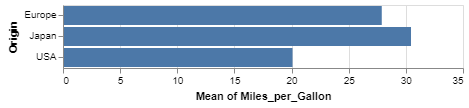

In [15]:
alt.Chart(cars).mark_bar().encode(y='Origin',
                                 x='mean(Miles_per_Gallon)')

# Grouping is done by origin and then mean(Miles_per_Gallon) is calculated

## One-dimensional Binnings: Creating histograms

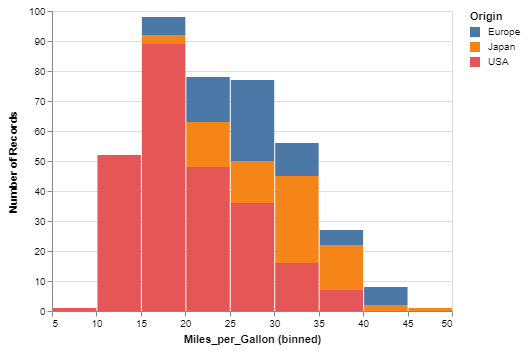

In [20]:
alt.Chart(cars).mark_bar().encode(
alt.X('Miles_per_Gallon',bin=True),
alt.Y('count()'),
alt.Color('Origin'))

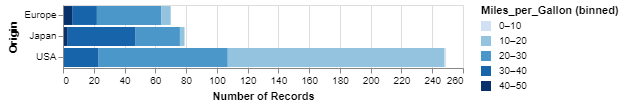

In [24]:
# We can play with color by assigning the values to different attributes
# Gives us a better vie of proportion of MPG in each country
alt.Chart(cars).mark_bar().encode(
    color=alt.Color('Miles_per_Gallon', bin=True),
    x='count()',
    y='Origin'
)

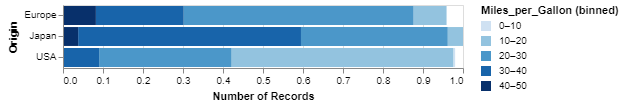

In [26]:
# To have a better idea we can normalize the counts using this
alt.Chart(cars).mark_bar().encode(
    color=alt.Color('Miles_per_Gallon', bin=True),
    x=alt.X('count()', stack='normalize'),
    y='Origin'
)

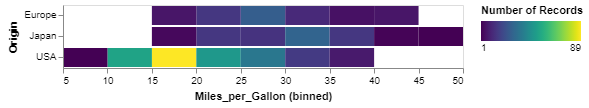

In [44]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    color='count()',
    y='Origin',
)
# This is histogram stacked on top of each other look like . check below
#  2D heatmap encodes the same data as a stacked histogram

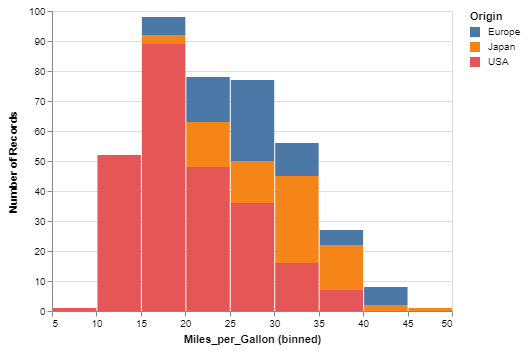

In [45]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    y='count()',
    color='Origin'
    # could also use alt.Y(aggregate='count', type='quantitative')
)

In [46]:
# Other Aggregates

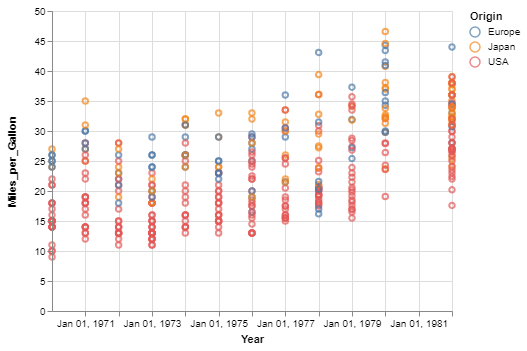

In [53]:
# Here we are trying to view the MPG over time for different origin
alt.Chart(cars).mark_point().encode(
    x='Year:T',
    color='Origin',
    y='Miles_per_Gallon'
)
# This grapgh is tough to understand the pattern as the points overlaps and gives a confusing view. So check out
# the next graph where we take the mean and the pattern is clearly visible

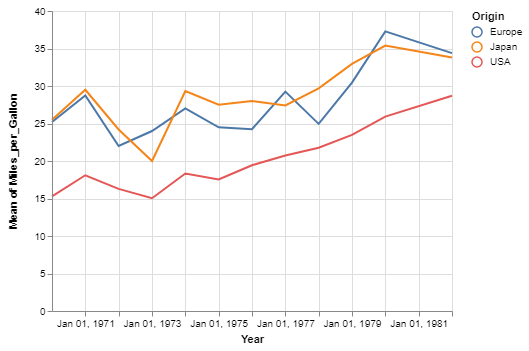

In [54]:
# To make it proper we are taking the mean of Miles_per_Gallon over a time period and plotting it for different Origin
alt.Chart(cars).mark_line().encode(
    x='Year:T',
    color='Origin',
    y='mean(Miles_per_Gallon)'
)

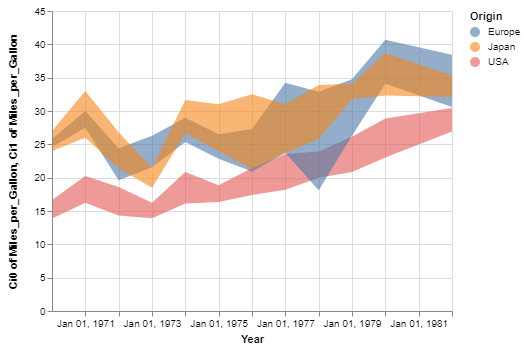

In [59]:
alt.Chart(cars).mark_area(opacity=0.6).encode(
    x='Year:T',
    color='Origin',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

# In the above code we are marking the lower and upper bounds of confidence interval on the mean .
# For that purpose mark_area() is being used, and we specify the lower and upper bounds of the 95% confidence interval of the mean using y and y2:

## Time Binnings with timeUnit

In [82]:
temps = data.seattle_temps()
print(temps.count())
temps.head()

date    8759
temp    8759
dtype: int64


,date,temp
0,2010-01-01 00:00:00,39.4
1,2010-01-01 01:00:00,39.2
2,2010-01-01 02:00:00,39.0
3,2010-01-01 03:00:00,38.9
4,2010-01-01 04:00:00,38.8


In [83]:
# alt.Chart(temps).mark_line().encode(
#     x='date:T',
#     y='temp:Q'
# )
# The above code is gonna throw a maxrowserror  as 
len(temps)

8759

In [84]:
# If rows is more than 5000 rows it will throw a maxerror ,This has been introduced or else its gonna show performance issues

In [85]:
# When you pass a pandas dataframe to an Altair chart, the result is that the data is converted to JSON and stored in the chart
# specification. This specification is then embedded in the output of your notebook, and if you make a few dozen charts this way
# with a large enough dataset,
# it can significantly slow down your machine.

## Workaround to deal with this type of error
### 1 .Convert it into small dataset using pandas

In [91]:
import pandas as pd
temps1 = temps.groupby(pd.DatetimeIndex(temps.date).date).mean().reset_index()
# Mean of temperatire across each day
print(len(temps1))
temps1.head()

365


,index,temp
0,2010-01-01,40.450000
1,2010-01-02,40.670833
2,2010-01-03,40.887500
3,2010-01-04,41.054167
4,2010-01-05,41.258333


## 2) Store the data to file, and reference the data by filename instead.
## This lets us plot the full dataset without having to embed it in the notebook.

## 3) Disable the MaxRowsError using

In [94]:
alt.data_transformers.enable('default', max_rows=None)
## But note this can lead to very large notebooks if you're not careful.

DataTransformerRegistry.enable('default')

## 4) Automatically load the data from disk using

In [98]:
alt.data_transformers.enable('json')
# which will automatically save the data to file and provide the url of that file to the chart each time a chart is created.
# We'll do the latter here, which is the most convenient and leads to the best performance:
# All these happens backend , so no need to worry.

# We will go with the last json one

DataTransformerRegistry.enable('json')

In [99]:
alt.Chart(temps).mark_line().to_dict()

{'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json',
 'config': {'view': {'height': 300, 'width': 400}},
 'data': {'format': {'type': 'json'},
  'url': 'altair-data-011bb02d-4803-46bd-8b13-7cdf41392218.json'},
 'mark': 'line'}

Data Type   |Shorthand Code|Description
------------|--------------|------------------
------------|--------------|------------------
quantitative|Q             |a continuous real-valued quantity
------------|--------------|------------------
------------|--------------|------------------
ordinal     |O             |a discrete ordered quantity
------------|--------------|------------------
------------|--------------|------------------
nominal     |N             |a discrete unordered category
------------|--------------|------------------
------------|--------------|------------------
temporal    |T             |a time or date value





In [114]:
# If types are not specified for data input as a DataFrame, Altair defaults to quantitative for any numeric data, 
# temporal for date/time data, and nominal for string data, 
# but be aware that these defaults are by no means always the correct choice!

# The types can either be expressed in a long-form using the channel encoding classes such as X and Y, or in 
# short-form using the Shorthand Syntax discussed below. For example, the following two methods of specifying the 
# type will lead to identical plots:
# https://altair-viz.github.io/user_guide/encoding.html  ... Check this for more

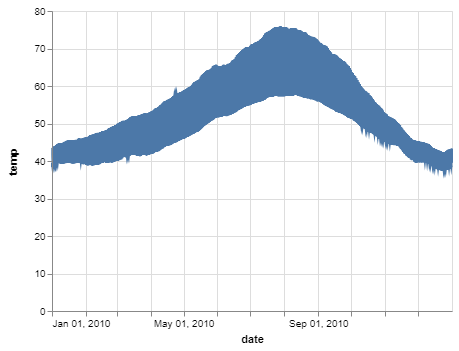

In [100]:
alt.Chart(temps).mark_line().encode(
    x='date:T',
    y='temp:Q'
)

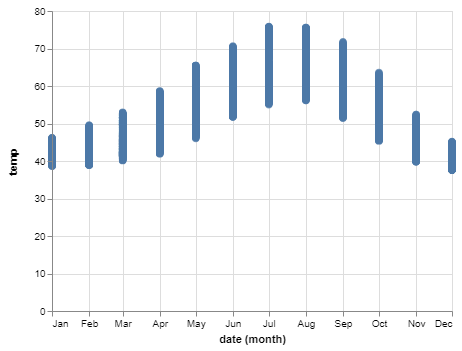

In [107]:
#  bin this data by month
alt.Chart(temps).mark_point().encode(
    x=alt.X('date:T', timeUnit='month'),
    y='temp:Q'
)

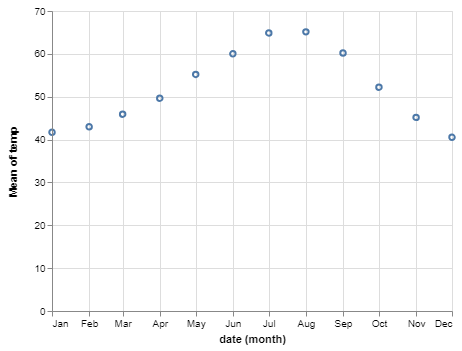

In [108]:
# aggregate the temperatures:
alt.Chart(temps).mark_point().encode(
    x=alt.X('date:T', timeUnit='month'),
    y='mean(temp):Q'
)

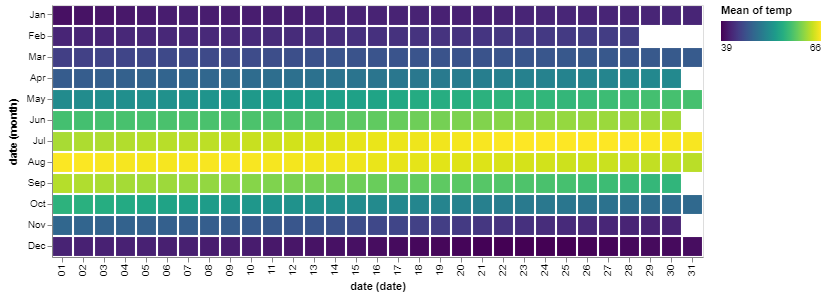

In [110]:
alt.Chart(temps).mark_rect().encode(
    x=alt.X('date:O', timeUnit='date'),
    y=alt.Y('date:O', timeUnit='month'),
    color='mean(temp):Q'
)

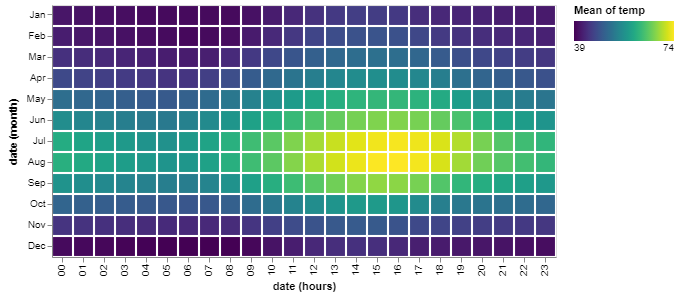

In [111]:
alt.Chart(temps).mark_rect().encode(
    x=alt.X('date:O', timeUnit='hours'),
    y=alt.Y('date:O', timeUnit='month'),
    color='mean(temp):Q'
)